##### 1. Implement Cohen-Sutherland line clipping algorithm as shown.

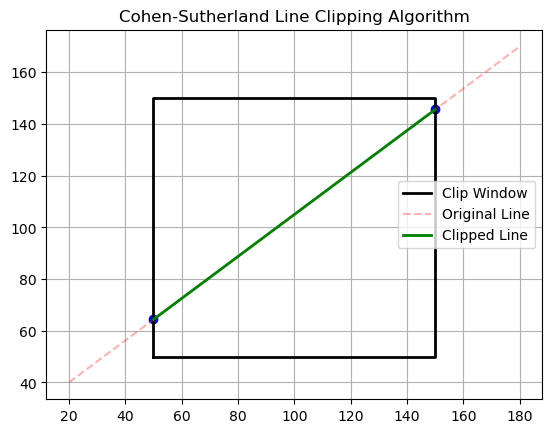

In [62]:
import matplotlib.pyplot as plt
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP =8
X_MIN, X_MAX = 50, 150
Y_MIN, Y_MAX =50, 150
def compute_code(x,y):
    code = INSIDE
    if x<X_MIN: code |= LEFT
    elif x> X_MAX: code |= RIGHT
    if y<Y_MIN: code |= BOTTOM
    elif y>Y_MAX: code|=TOP
    return code
def cohen_sutherland_clip(x1, y1, x2, y2):
    code1= compute_code(x1, y1)
    code2= compute_code(x2, y2)
    accept = False
    while True:
        if code1 == 0 and code2==0:
            accept = True 
            break
        elif (code1&code2)!=0:
            break
        else:
            code_out= code1 if code1!=0 else code2
            if code_out&TOP:
                x = x1 + (x2-x1) *(Y_MAX - y1)/(y2-y1)
                y = Y_MAX
            elif code_out& BOTTOM:
                x= x1+ (x2-x1) * (Y_MIN - y1) /(y2-y1)
                y= Y_MIN
            elif code_out & RIGHT:
                y= y1 + (y2-y1) * (X_MAX-x1)/(x2-x1)
                x= X_MAX
            elif code_out & LEFT:
                y= y1 + (y2-y1) * (X_MIN-x1)/(x2-x1) 
                x = X_MIN
            if code_out ==code1:
                x1, y1 = x, y
                code1= compute_code(x1, y1)
            else:
                x2, y2 = x, y
                code2 = compute_code(x2, y2)
    return (x1, y1, x2,y2) if accept else None
def display_clip(original_line):
    x1, y1 ,x2, y2= original_line
    clipped = cohen_sutherland_clip(x1, y1 , x2 ,y2)
    window_x =[X_MIN, X_MAX, X_MAX, X_MIN, X_MIN]
    window_y = [Y_MIN, Y_MIN, Y_MAX, Y_MAX, Y_MIN]
    plt.plot(window_x , window_y , color='black', linewidth=2, label='Clip Window')
    plt.plot([x1, x2], [y1, y2], color = 'r', linestyle= '--', alpha =0.3, label = 'Original Line')
    if clipped: 
        cx1, cy1, cx2, cy2 = clipped
        plt.plot([cx1, cx2], [cy1, cy2], color = 'g', linestyle= '-', linewidth= 2, label= 'Clipped Line')
        plt.scatter([cx1,cx2],[cy1,cy2], color='Blue')
    plt.title("Cohen-Sutherland Line Clipping Algorithm")
    plt.legend()
    plt.grid(True)
    plt.show()
line = (20, 40, 180, 170)
display_clip(line)                  

##### 2. Impelement Liang-Barskey line clipping algorithm as shown.

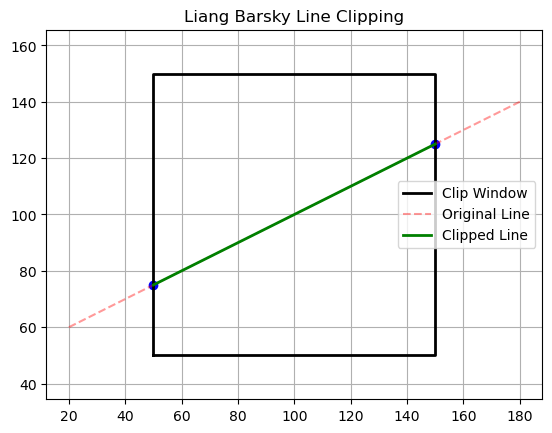

In [63]:
import matplotlib.pyplot as plt
def liang_barsky(x1, y1, x2, y2, x_min, y_min, x_max, y_max):
    dx = x2 - x1
    dy = y2 - y1
    p=  [-dx, dx, -dy, dy]
    q = [x1 -x_min, x_max - x1, y1- y_min, y_max - y1]
    u1 , u2 = 0.0, 1.0
    for i in range(4):
        if p[i] == 0 :
            if q[i]< 0:
                return None
        else:
            r = q[i]/p[i]
            if p[i]<0:
                u1 = max(u1, r)
            else:
                u2 = min (u2, r)
    if u1<u2:
        nx1 = x1 + u1*dx
        nx2= x1 + u2 * dx
        ny1 = y1 + u1* dy
        ny2 = y1 + u2 *dy
        return (nx1, ny1, nx2, ny2)
    else:
        return None
def display_liang_barsky(line, window):
    x1, y1, x2, y2 = line
    x_min, y_min, x_max, y_max = window
    clipped = liang_barsky(x1, y1, x2, y2, x_min, y_min, x_max, y_max)
    rect_x = [x_min, x_max, x_max, x_min, x_min]
    rect_y = [y_min, y_min, y_max, y_max, y_min]
    plt.plot(rect_x, rect_y, color= 'black', linewidth = 2, label = "Clip Window")
    plt.plot([x1, x2], [y1, y2], color ='r', linestyle = '--', alpha = 0.4, label= 'Original Line')
    if clipped:
        cx1, cy1 ,cx2, cy2 = clipped
        plt.plot([cx1, cx2], [cy1, cy2] , color = 'g', linewidth= 2, label = 'Clipped Line')
        plt.scatter([cx1, cx2], [cy1, cy2], color = 'b')
    plt.title("Liang Barsky Line Clipping")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()
win= (50, 50, 150, 150)
original_line = (20,60, 180, 140)
display_liang_barsky(original_line, win)

##### 3. Given a clipping window (𝑥min, 𝑦min) = (10, 10), (𝑥max, 𝑦max) = (100, 80), determine the region (out) codes for the following points using the Cohen– Sutherland algorithm:
###### (a) (5, 50)
###### (b) (50, 90)
###### (c) (120, 40)
###### (d) (50, 50)

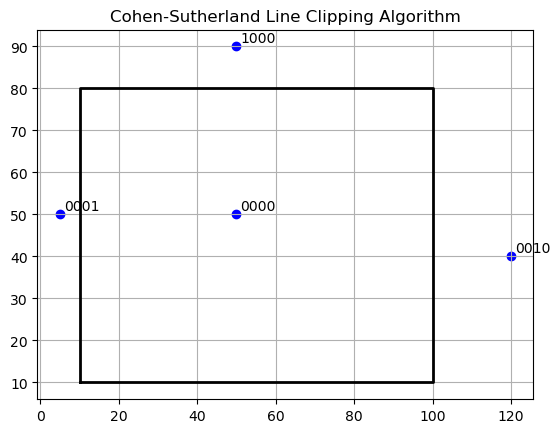

In [64]:
import matplotlib.pyplot as plt
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP =8
X_MIN, X_MAX = 10, 100
Y_MIN, Y_MAX =10, 80
def compute_code(x,y):
    code = INSIDE
    if x<X_MIN: code |= LEFT
    elif x> X_MAX: code |= RIGHT
    if y<Y_MIN: code |= BOTTOM
    elif y>Y_MAX: code|=TOP
    return code

def display_clip(point):
    window_x =[X_MIN, X_MAX, X_MAX, X_MIN, X_MIN]
    window_y = [Y_MIN, Y_MIN, Y_MAX, Y_MAX, Y_MIN]
    plt.plot(window_x , window_y , color='Black', linewidth=2)
    for x, y in point:
        code = compute_code(x, y)
        plt.scatter(x, y, color='Blue')
        plt.text(x+1, y+1, format(code, '04b'))
    plt.title("Cohen-Sutherland Line Clipping Algorithm")
    plt.grid(True)
    plt.show()
point = [(5, 50), (50, 90), (120, 40), (50, 50)]
display_clip(point)                  

##### 4. For a line joining the points (5, 20) and (120, 70), determine whether the line is
###### (a) trivially accepted,
###### (b) trivially rejected, or
###### (c) partially visible
##### using the Cohen–Sutherland line clipping algorithm.

In [65]:
import matplotlib.pyplot as plt
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP =8
X_MIN, X_MAX = 50, 150
Y_MIN, Y_MAX =50, 150
def compute_code(x,y):
    code = INSIDE
    if x<X_MIN: code |= LEFT
    elif x> X_MAX: code |= RIGHT
    if y<Y_MIN: code |= BOTTOM
    elif y>Y_MAX: code|=TOP
    return code
def cohen_sutherland_clip(line):
    x1, y1, x2, y2 =line
    code1= compute_code(x1, y1)
    code2= compute_code(x2, y2)
    if code1 == 0 and code2 == 0:
        print("trivially accepted")
    elif (code1 & code2) != 0:
        print("Trivially Rejected")
    else:
        print("Partially Visible")
line = (5, 20, 120, 70)
cohen_sutherland_clip(line)                  


Partially Visible


##### 5. For a line segment defined by the endpoints (20, 30) and (120, 90), calculate the values of 𝑝𝑖 and 𝑞𝑖 used in the Liang–Barsky line clipping algorithm.

In [66]:
import matplotlib.pyplot as plt
def liang_barsky(original_line,win):
    x1, y1, x2 , y2 = original_line
    x_min, y_min, x_max, y_max = win
    dx = x2 - x1
    dy = y2 - y1
    p=  [-dx, dx, -dy, dy]
    q = [x1 -x_min, x_max - x1, y1- y_min, y_max - y1]
    for i in range(4):
        print(f"p[{i}]:",p[i],"\t", f"q[{i}]:", q[i])
win= (50, 50, 150, 150)
original_line = (20,30, 120, 90)
liang_barsky(original_line, win)

p[0]: -100 	 q[0]: -30
p[1]: 100 	 q[1]: 130
p[2]: -60 	 q[2]: -20
p[3]: 60 	 q[3]: 120


##### 6. A line segment has endpoints (40, 10) and (90, 70). Using the Liang–Barsky algorithm, determine whether the line is accepted or rejected for a clipping window defined by 𝑥min = 30, 𝑥max = 80, 𝑦min = 20, 𝑦max = 60.

In [67]:
import matplotlib.pyplot as plt
def liang_barsky(original_line, win):
    x1, y1, x2, y2 = original_line
    x_min, y_min, x_max, y_max = win
    dx = x2 - x1
    dy = y2 - y1
    p=  [-dx, dx, -dy, dy]
    q = [x1 -x_min, x_max - x1, y1- y_min, y_max - y1]
    u1 , u2 = 0.0, 1.0
    for i in range(4):
        if p[i] == 0 :
            if q[i]< 0:
                print("Rejected")
        else:
            r = q[i]/p[i]
            if p[i]<0:
                u1 = max(u1, r)
            else:
                u2 = min (u2, r)
    if u1<u2:
        print("Accepted")
    else:
        print("Rejected")
win= (30, 20, 80, 60)
original_line = (40, 10, 90, 70)
liang_barsky(original_line, win)

Accepted


##### 7. Compare the number of intersection calculations required by the Cohen–Sutherland and Liang–Barsky algorithms for a partially visible line segment.

In [68]:
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8
X_MIN, X_MAX = 50, 150
Y_MIN, Y_MAX = 50, 150
def compute_code(x, y):
    code = INSIDE
    if x < X_MIN: code |= LEFT
    elif x > X_MAX: code |= RIGHT
    if y < Y_MIN: code |= BOTTOM
    elif y > Y_MAX: code |= TOP
    return code
def cohen_sutherland_count(x1, y1, x2, y2):
    code1 = compute_code(x1, y1)
    code2 = compute_code(x2, y2)
    count = 0 
    while True:
        if code1 == 0 and code2 == 0:
            break
        elif (code1 & code2) != 0:
            break
        else:
            code_out = code1 if code1 != 0 else code2
            if code_out & TOP:
                x = x1 + (x2 - x1) * (Y_MAX - y1) / (y2 - y1)
                y = Y_MAX
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (Y_MIN - y1) / (y2 - y1)
                y = Y_MIN
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (X_MAX - x1) / (x2 - x1)
                x = X_MAX
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (X_MIN - x1) / (x2 - x1)
                x = X_MIN
            count += 1  
            if code_out == code1:
                x1, y1 = x, y
                code1 = compute_code(x1, y1)
            else:
                x2, y2 = x, y
                code2 = compute_code(x2, y2)
    return count
def liang_barsky_count(x1, y1, x2, y2, x_min, y_min, x_max, y_max):
    dx = x2 - x1
    dy = y2 - y1
    p = [-dx, dx, -dy, dy]
    q = [x1 - x_min, x_max - x1, y1 - y_min, y_max - y1]
    u1, u2 = 0.0, 1.0
    count = 0
    for i in range(4):
        if p[i] != 0:
            r = q[i] / p[i]
            count += 1 
            if p[i] < 0:
                u1 = max(u1, r)
            else:
                u2 = min(u2, r)
        elif q[i] < 0:
            return count  
    return count
line = (20, 60, 180, 140)
cs_count = cohen_sutherland_count(*line)
lb_count = liang_barsky_count(*line, X_MIN, Y_MIN, X_MAX, Y_MAX)
print("Cohen–Sutherland intersection calculations: ",cs_count)
print("Liang–Barsky intersection calculations: ", lb_count)

Cohen–Sutherland intersection calculations:  2
Liang–Barsky intersection calculations:  4
